In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
! pip install --user researchpy

In [3]:
import researchpy # for t-test stuff! 

In [4]:
df = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_IG.csv') 

In [5]:
df.head()

,Date,OAS,Total Return % 1-mo-LOC,Agg Returns,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
0,1997-01-31 00:00:00,0.032073,0.584587,0.517158,0.511626,0.396204,0.523567,0.400107,0.497321,0.463135,0.456587,0.526603,0.411268,0.507779,0.321350,0.437807,0.389493,0.394455,4
1,1997-02-28 00:00:00,0.022910,0.593261,0.509066,0.551748,0.466362,0.494901,0.455225,0.503095,0.605420,0.427400,0.512503,0.411863,0.501391,0.331717,0.463633,0.371790,0.400467,4
2,1997-03-31 00:00:00,0.013746,0.477740,0.317745,0.511322,0.405427,0.457001,0.448342,0.478600,0.528539,0.411794,0.528331,0.420693,0.524060,0.342466,0.418786,0.345951,0.383512,4
3,1997-04-30 00:00:00,0.022910,0.697805,0.685033,0.448404,0.513258,0.478501,0.542739,0.470552,0.588306,0.392140,0.521106,0.431853,0.513958,0.358566,0.445930,0.308511,0.380955,4
4,1997-05-31 00:00:00,0.032073,0.643998,0.607264,0.468161,0.451746,0.516262,0.714240,0.426636,0.569584,0.410815,0.517072,0.440628,0.540596,0.363678,0.441016,0.285278,0.339880,4


In [6]:
df = df.drop(columns=["Total Return % 1-mo-LOC", "Agg Returns" ,
"Excess Return % 1-mo (Treasury)", "Excess Return % 1-mo (Agg)"], axis = 0) # get rid of these useless columns

In [7]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,279.000000,277.000000,277.000000,274.000000,274.000000,270.000000,270.000000,267.000000,267.000000,257.000000,257.000000,245.000000,245.000000,279.00000
mean,0.417782,0.494780,0.503562,0.482637,0.502400,0.492097,0.498393,0.491650,0.504837,0.509006,0.492070,0.501216,0.509136,2.55914
std,0.243309,0.227093,0.207410,0.224126,0.208517,0.216277,0.201213,0.212409,0.208761,0.226952,0.198216,0.196648,0.187849,1.08418
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,0.238259,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,2.00000
50%,0.375716,0.516951,0.505593,0.477463,0.484370,0.501543,0.487557,0.504171,0.498794,0.502269,0.492280,0.526284,0.541649,3.00000
75%,0.542955,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,3.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.00000


# drop outliers that we have identified as 0 and 1s (1 is > upper fence, 0 is < lower fence)

In [8]:
# Getting rid of outliers below. When we ran the script to label outliers, the script
# would label a number an outlier a 1 if it was above the Upper fence and would label
# it a 0 if it was an outlier below the lower fence.
# This script replaces all outliers as "NaN"

df["OAS"] = df["OAS"].replace([0],["NaN"])
df["OAS"] = df["OAS"].replace([1],["Nan"])

df = df.dropna()

df['OAS'] = pd.to_numeric(df['OAS'],errors='coerce') # converting back to float64 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              245 non-null    object 
 1   OAS                               231 non-null    float64
 2   Excess Return % 3-mo (Treasury)   245 non-null    float64
 3   Excess Return % 3-mo (Agg)        245 non-null    float64
 4   Excess Return % 6-mo (Treasury)   245 non-null    float64
 5   Excess Return % 6-mo (Agg)        245 non-null    float64
 6   Excess Return % 9-mo (Treasury)   245 non-null    float64
 7   Excess Return % 9-mo (Agg)        245 non-null    float64
 8   Excess Return % 12-mo (Treasury)  245 non-null    float64
 9   Excess Return % 12-mo (Agg)       245 non-null    float64
 10  Excess Return % 24-mo (Treasury)  245 non-null    float64
 11  Excess Return % 24-mo (Agg)       245 non-null    float64
 12  Excess R

# Now lets select all OAS levels and their coresponding excess returns that are above the 90th percentile (top 10%)

In [9]:
# Select * 
# From OAS
# Where OAS >= 90th percentile
## SQL version above ## 
highspread = df["OAS"].quantile(.90) # every data point over the 90th percentile
print(highspread)

# pandas version of the SQL function 
df = df[(df['OAS'] > highspread)]

0.67812142


In [10]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,0.817571,0.567722,0.604612,0.587151,0.619533,0.589979,0.600093,0.610048,0.638958,0.760181,0.680337,0.693966,0.687538,2.260870
std,0.083519,0.351839,0.284144,0.325435,0.317808,0.337267,0.336652,0.310184,0.324736,0.148083,0.101905,0.056653,0.062282,1.009833
min,0.691867,0.000000,0.025155,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.475182,0.450761,0.564550,0.551931,1.000000
25%,0.756014,0.267985,0.414463,0.314222,0.515319,0.540067,0.593404,0.634317,0.659377,0.622874,0.623196,0.661645,0.649198,1.000000
50%,0.792669,0.642916,0.633589,0.695729,0.743116,0.692107,0.713364,0.752004,0.782420,0.805298,0.699663,0.688406,0.683936,2.000000
75%,0.891180,0.873760,0.822063,0.811510,0.814904,0.851494,0.848412,0.820748,0.835414,0.858255,0.746723,0.728007,0.738718,3.000000
max,0.966781,1.000000,1.000000,1.000000,1.000000,0.915222,0.907077,0.874431,0.938608,0.998973,0.876645,0.810577,0.805064,4.000000


In [11]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  23.0  0.817571  0.083519  0.017415   
 1  Excess Return % 3-mo (Treasury)  23.0  0.567722  0.351839  0.073363   
 2                         combined  46.0  0.692646  0.282636  0.041672   
 
    95% Conf.  Interval  
 0   0.781454  0.853687  
 1   0.415576  0.719869  
 2   0.608714  0.776579  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...   0.2498
 1                              Degrees of freedom =   44.0000
 2                                               t =    3.3135
 3                           Two side test p value =    0.0018
 4                          Difference < 0 p value =    0.9991
 5                          Difference > 0 p value =    0.0009
 6                                       Cohen's d =    0.9771
 7                                       Hedge's g =    0.9604
 8                        

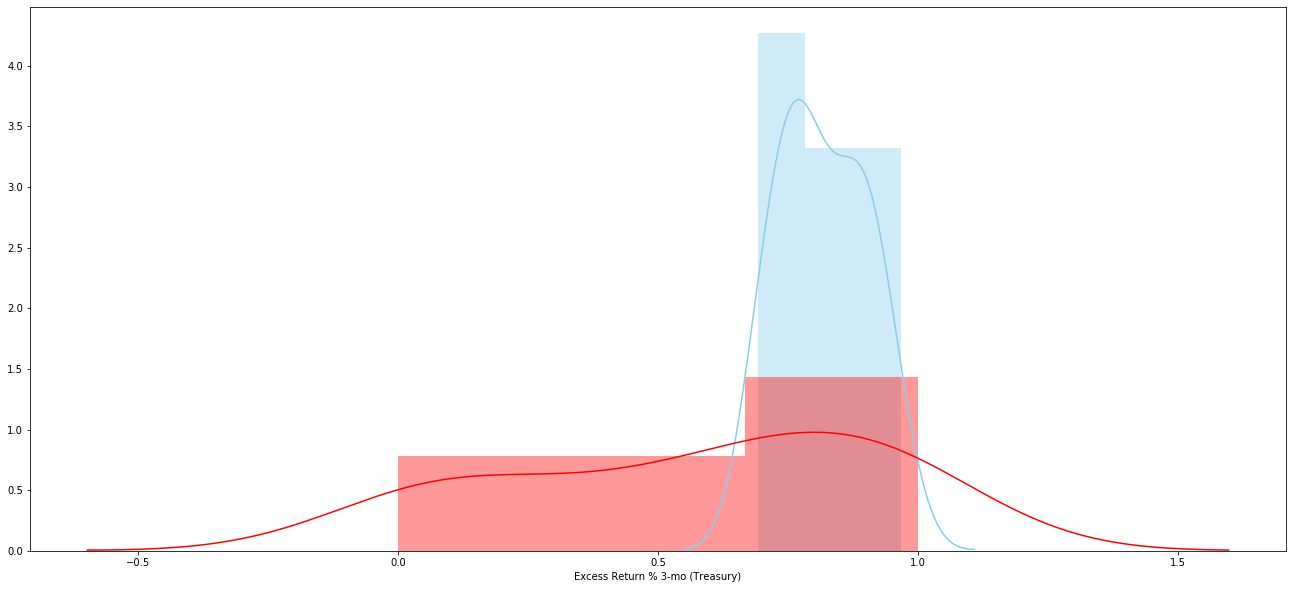

In [12]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [13]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  23.0  0.817571  0.083519  0.017415   0.781454   
 1  Excess Return % 3-mo (Agg)  23.0  0.604612  0.284144  0.059248   0.481738   
 2                    combined  46.0  0.711091  0.233392  0.034412   0.641782   
 
    Interval  
 0  0.853687  
 1  0.727485  
 2  0.780400  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =    0.2130
 1                             Degrees of freedom =   44.0000
 2                                              t =    3.4485
 3                          Two side test p value =    0.0013
 4                         Difference < 0 p value =    0.9994
 5                         Difference > 0 p value =    0.0006
 6                                      Cohen's d =    1.0169
 7                                      Hedge's g =    0.9995
 8                                  Glass's delta =    

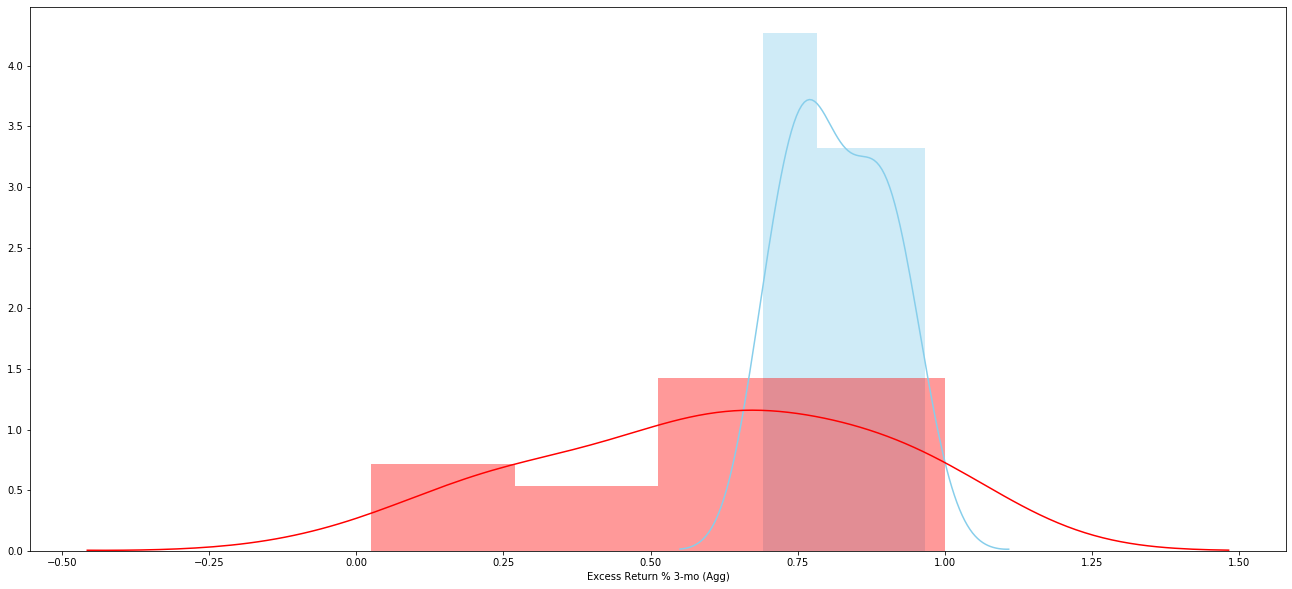

In [14]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [15]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  23.0  0.817571  0.083519  0.017415   
 1  Excess Return % 6-mo (Treasury)  23.0  0.587151  0.325435  0.067858   
 2                         combined  46.0  0.702361  0.262213  0.038661   
 
    95% Conf.  Interval  
 0   0.781454  0.853687  
 1   0.446423  0.727879  
 2   0.624493  0.780228  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...   0.2304
 1                              Degrees of freedom =   44.0000
 2                                               t =    3.2890
 3                           Two side test p value =    0.0020
 4                          Difference < 0 p value =    0.9990
 5                          Difference > 0 p value =    0.0010
 6                                       Cohen's d =    0.9699
 7                                       Hedge's g =    0.9533
 8                        

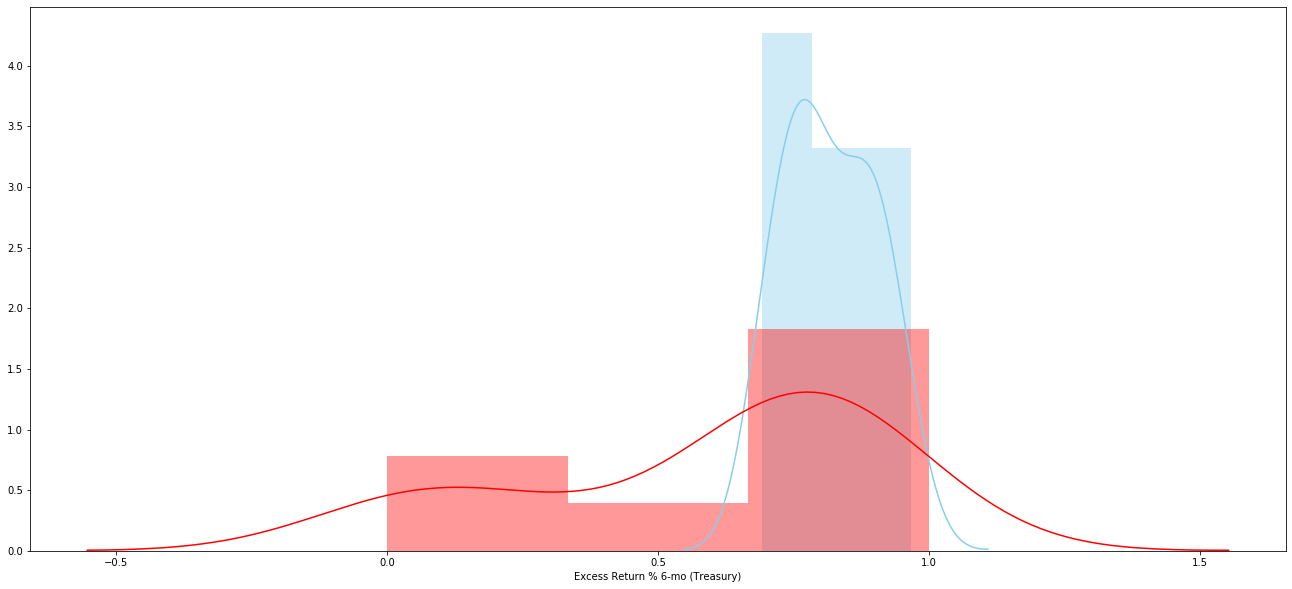

In [16]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [17]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  23.0  0.817571  0.083519  0.017415   0.781454   
 1  Excess Return % 6-mo (Agg)  23.0  0.619533  0.317808  0.066268   0.482102   
 2                    combined  46.0  0.718552  0.250622  0.036952   0.644126   
 
    Interval  
 0  0.853687  
 1  0.756963  
 2  0.792977  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =    0.1980
 1                             Degrees of freedom =   44.0000
 2                                              t =    2.8903
 3                          Two side test p value =    0.0060
 4                         Difference < 0 p value =    0.9970
 5                         Difference > 0 p value =    0.0030
 6                                      Cohen's d =    0.8523
 7                                      Hedge's g =    0.8377
 8                                  Glass's delta =    

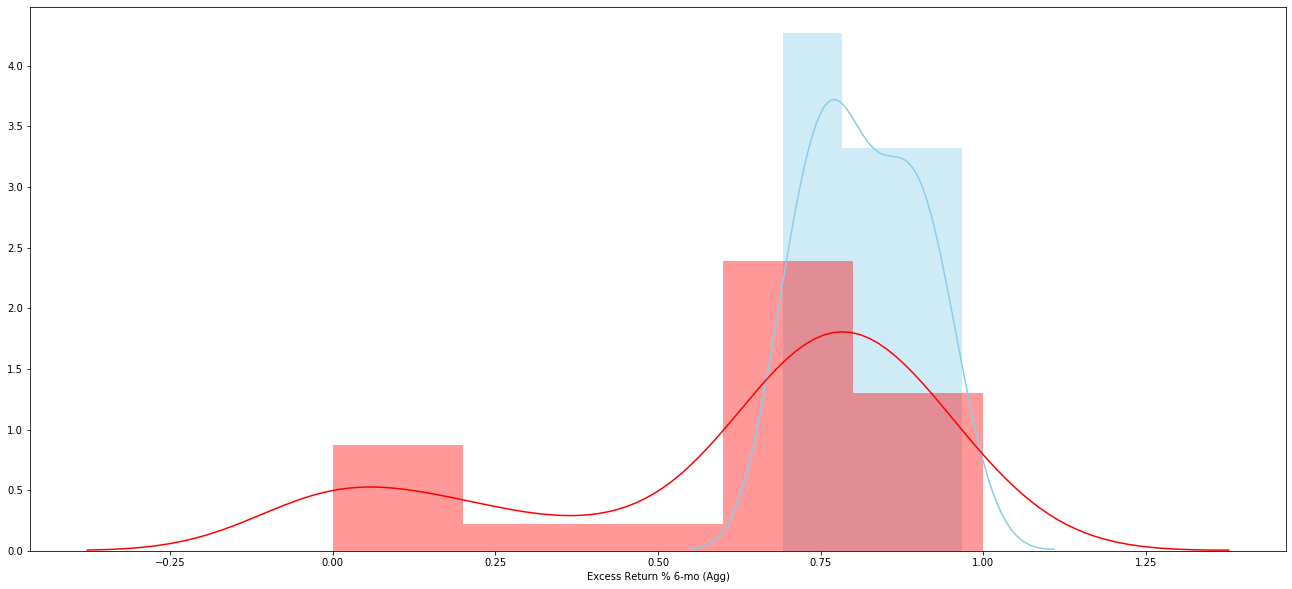

In [18]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [19]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  23.0  0.817571  0.083519  0.017415   
 1  Excess Return % 9-mo (Treasury)  23.0  0.589979  0.337267  0.070325   
 2                         combined  46.0  0.703775  0.268809  0.039634   
 
    95% Conf.  Interval  
 0   0.781454  0.853687  
 1   0.444134  0.735825  
 2   0.623949  0.783601  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...   0.2276
 1                              Degrees of freedom =   44.0000
 2                                               t =    3.1414
 3                           Two side test p value =    0.0030
 4                          Difference < 0 p value =    0.9985
 5                          Difference > 0 p value =    0.0015
 6                                       Cohen's d =    0.9263
 7                                       Hedge's g =    0.9105
 8                        

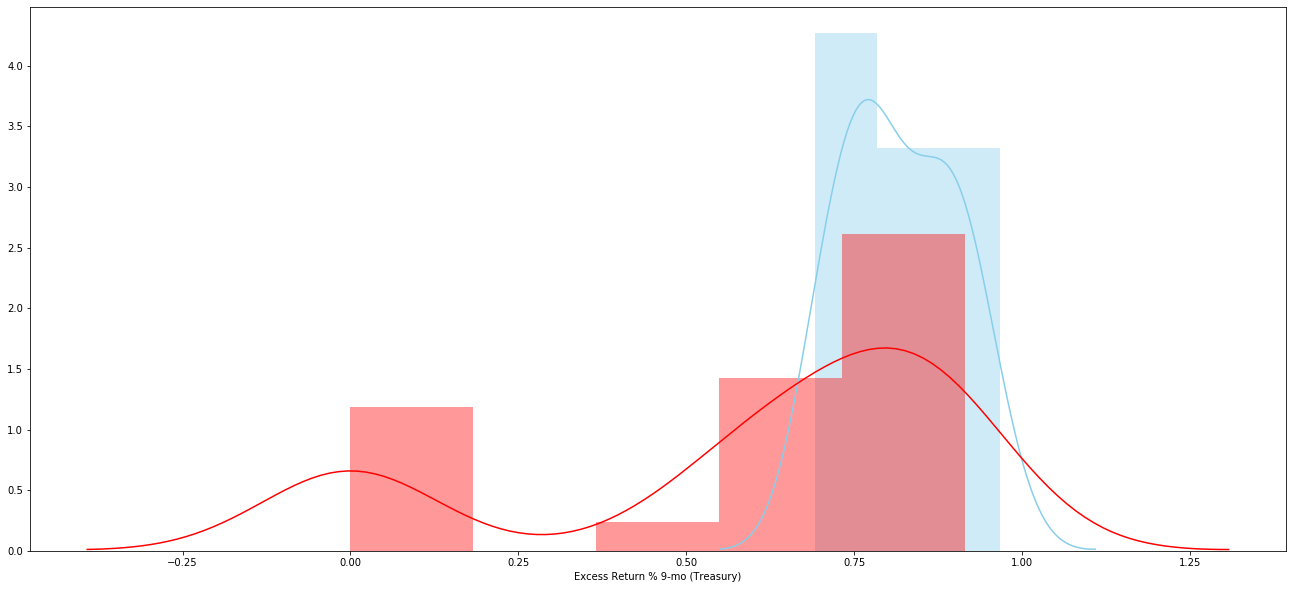

In [20]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [21]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  23.0  0.817571  0.083519  0.017415   0.781454   
 1  Excess Return % 9-mo (Agg)  23.0  0.600093  0.336652  0.070197   0.454513   
 2                    combined  46.0  0.708832  0.266280  0.039261   0.629756   
 
    Interval  
 0  0.853687  
 1  0.745672  
 2  0.787907  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =    0.2175
 1                             Degrees of freedom =   44.0000
 2                                              t =    3.0070
 3                          Two side test p value =    0.0043
 4                         Difference < 0 p value =    0.9978
 5                         Difference > 0 p value =    0.0022
 6                                      Cohen's d =    0.8867
 7                                      Hedge's g =    0.8715
 8                                  Glass's delta =    

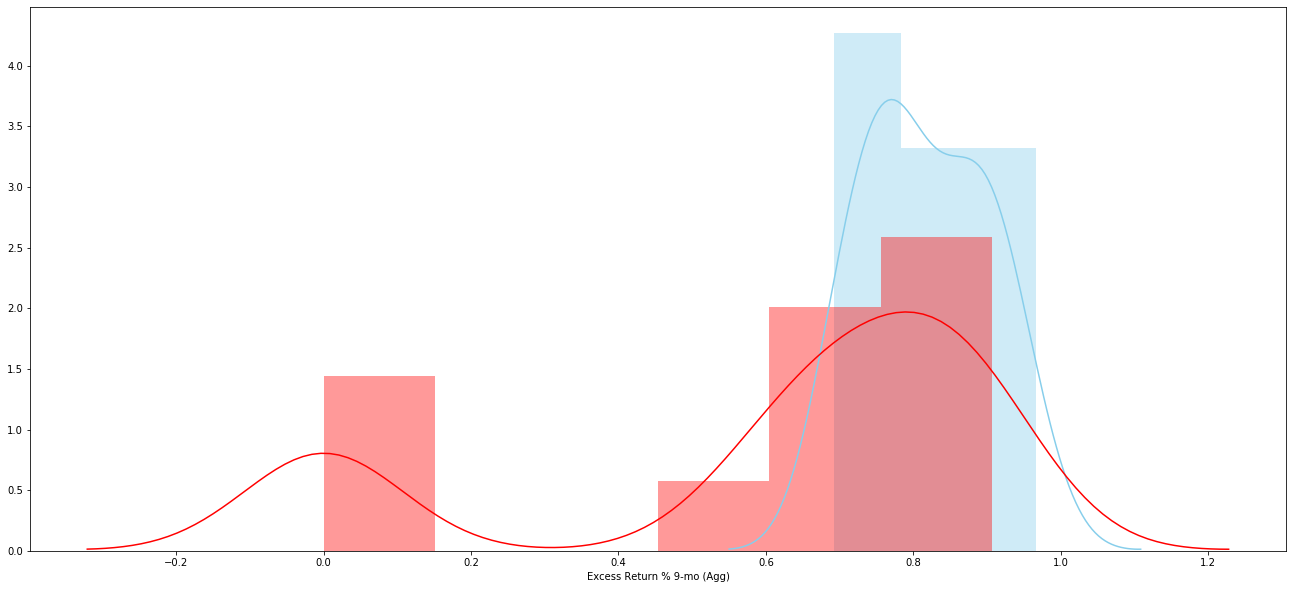

In [22]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [23]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  23.0  0.817571  0.083519  0.017415   
 1  Excess Return % 12-mo (Treasury)  23.0  0.610048  0.310184  0.064678   
 2                          combined  46.0  0.713809  0.247899  0.036551   
 
    95% Conf.  Interval  
 0   0.781454  0.853687  
 1   0.475914  0.744181  
 2   0.640192  0.787426  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Treas...   0.2075
 1                              Degrees of freedom =   44.0000
 2                                               t =    3.0982
 3                           Two side test p value =    0.0034
 4                          Difference < 0 p value =    0.9983
 5                          Difference > 0 p value =    0.0017
 6                                       Cohen's d =    0.9136
 7                                       Hedge's g =    0.8980
 8                    

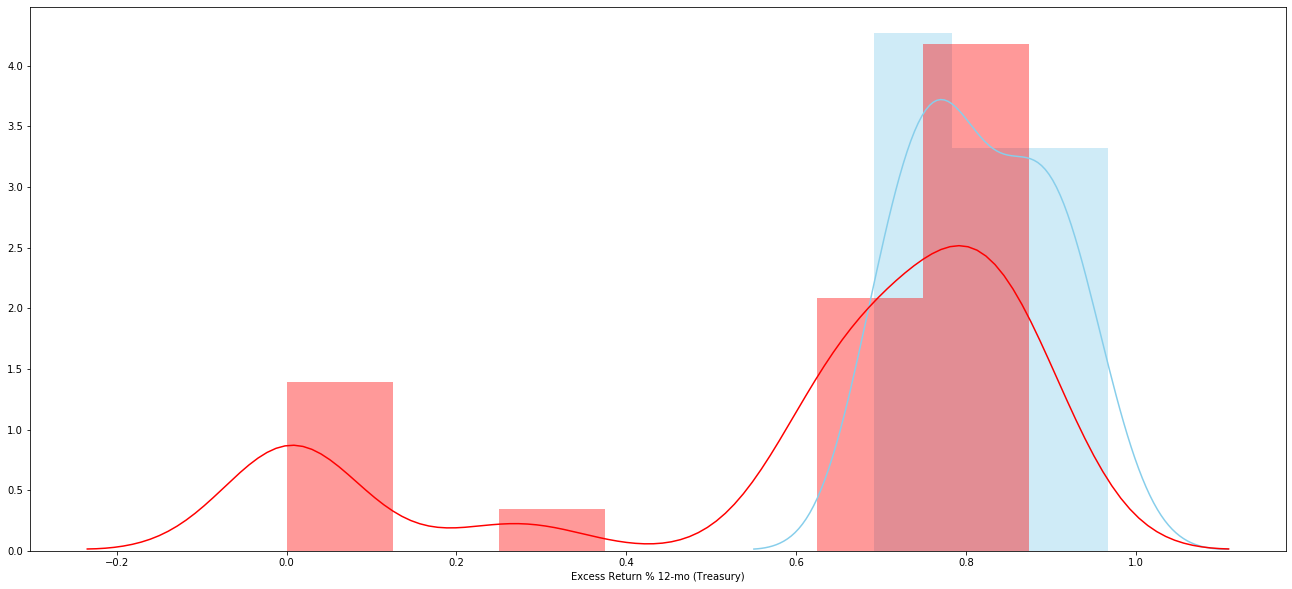

In [24]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [25]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  23.0  0.817571  0.083519  0.017415   0.781454   
 1  Excess Return % 12-mo (Agg)  23.0  0.638958  0.324736  0.067712   0.498531   
 2                     combined  46.0  0.728264  0.251233  0.037042   0.653657   
 
    Interval  
 0  0.853687  
 1  0.779384  
 2  0.802871  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =    0.1786
 1                              Degrees of freedom =   44.0000
 2                                               t =    2.5547
 3                           Two side test p value =    0.0142
 4                          Difference < 0 p value =    0.9929
 5                          Difference > 0 p value =    0.0071
 6                                       Cohen's d =    0.7533
 7                                       Hedge's g =    0.7404
 8                                   Glass

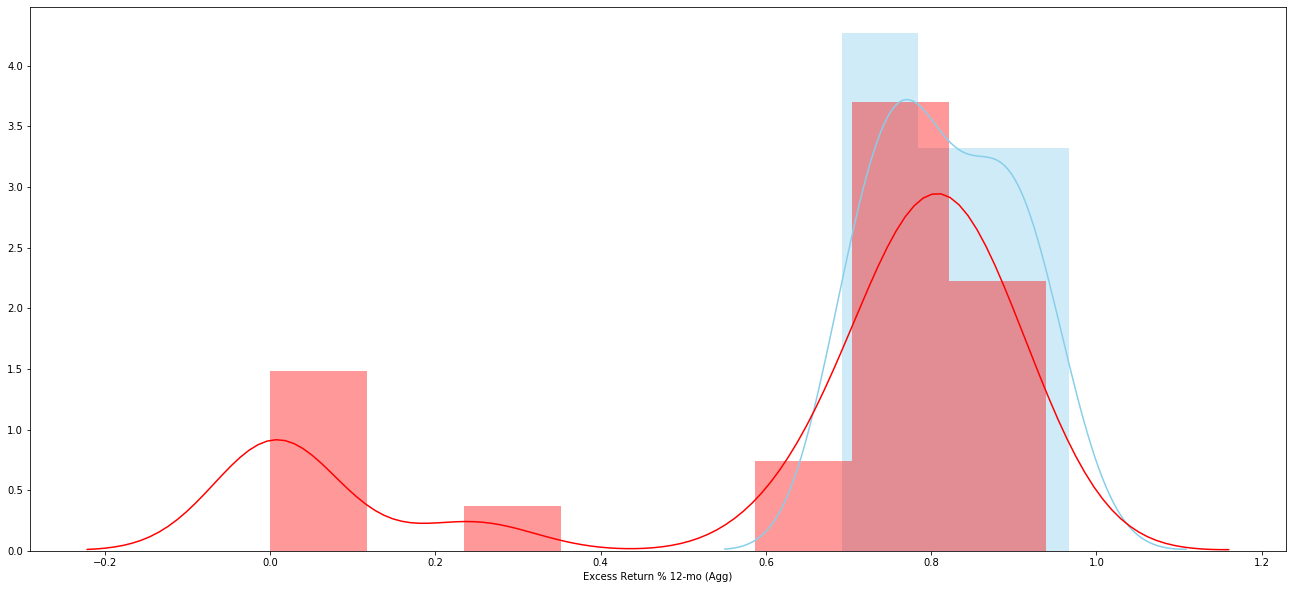

In [26]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [27]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  23.0  0.817571  0.083519  0.017415   
 1  Excess Return % 24-mo (Treasury)  23.0  0.760181  0.148083  0.030877   
 2                          combined  46.0  0.788876  0.122362  0.018041   
 
    95% Conf.  Interval  
 0   0.781454  0.853687  
 1   0.696145  0.824217  
 2   0.752539  0.825213  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Treas...   0.0574
 1                              Degrees of freedom =   44.0000
 2                                               t =    1.6189
 3                           Two side test p value =    0.1126
 4                          Difference < 0 p value =    0.9437
 5                          Difference > 0 p value =    0.0563
 6                                       Cohen's d =    0.4774
 7                                       Hedge's g =    0.4692
 8                    

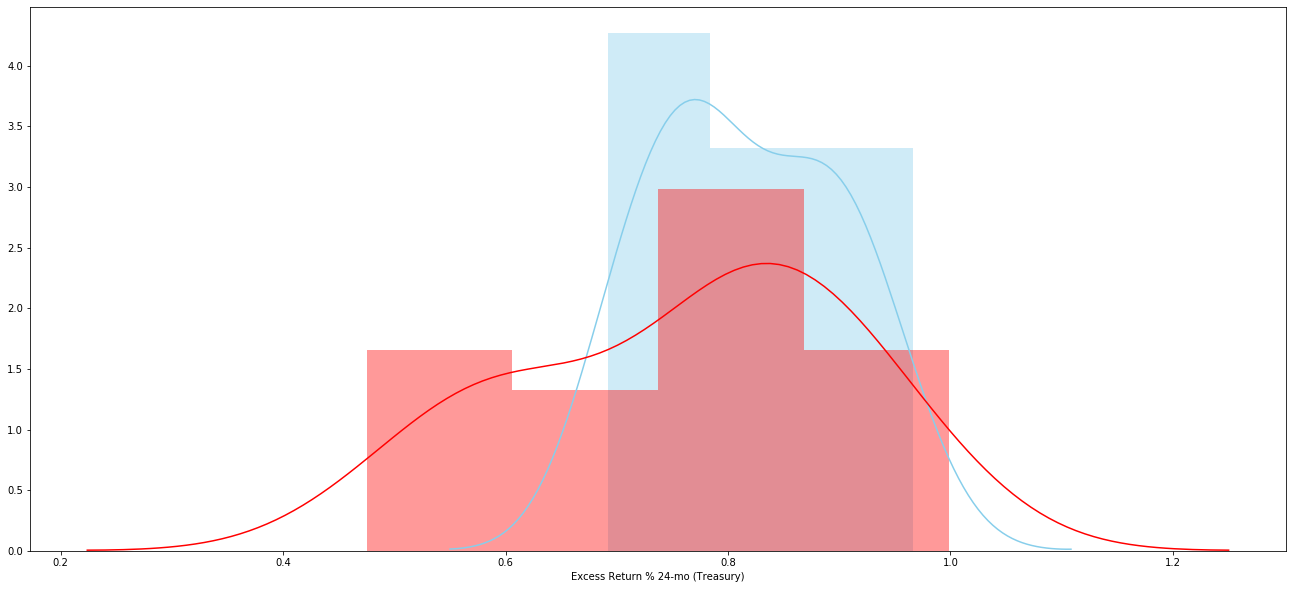

In [28]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [29]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  23.0  0.817571  0.083519  0.017415   0.781454   
 1  Excess Return % 24-mo (Agg)  23.0  0.680337  0.101905  0.021249   0.636270   
 2                     combined  46.0  0.748954  0.115326  0.017004   0.714706   
 
    Interval  
 0  0.853687  
 1  0.724404  
 2  0.783201  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =    0.1372
 1                              Degrees of freedom =   44.0000
 2                                               t =    4.9952
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.4730
 7                                       Hedge's g =    1.4477
 8                                   Glass

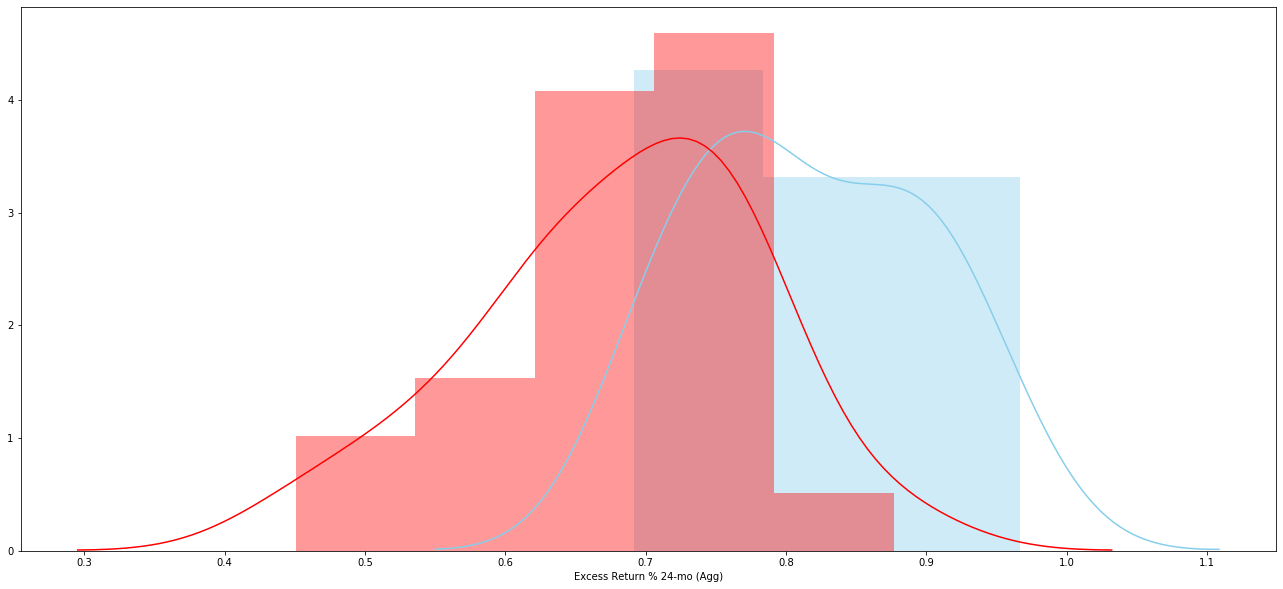

In [30]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [31]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  23.0  0.817571  0.083519  0.017415   
 1  Excess Return % 36-mo (Treasury)  23.0  0.693966  0.056653  0.011813   
 2                          combined  46.0  0.755768  0.094253  0.013897   
 
    95% Conf.  Interval  
 0   0.781454  0.853687  
 1   0.669468  0.718465  
 2   0.727779  0.783758  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Treas...   0.1236
 1                              Degrees of freedom =   44.0000
 2                                               t =    5.8738
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.7321
 7                                       Hedge's g =    1.7024
 8                    

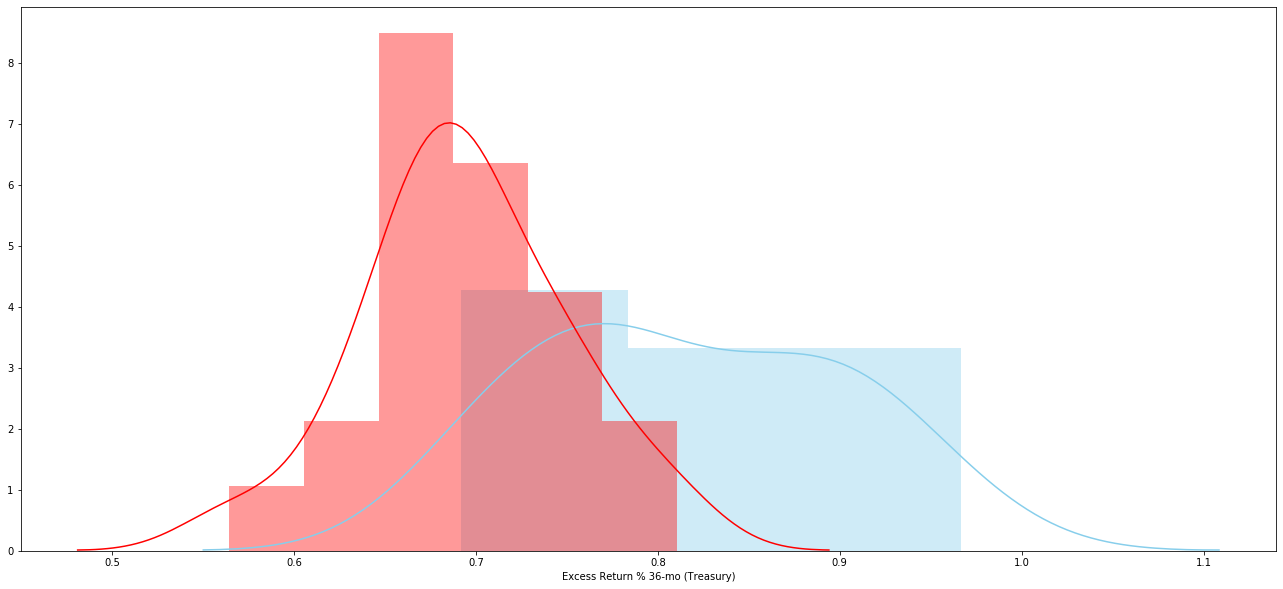

In [32]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [33]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  23.0  0.817571  0.083519  0.017415   0.781454   
 1  Excess Return % 36-mo (Agg)  23.0  0.687538  0.062282  0.012987   0.660605   
 2                     combined  46.0  0.752554  0.098121  0.014467   0.723416   
 
    Interval  
 0  0.853687  
 1  0.714471  
 2  0.781692  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =    0.1300
 1                              Degrees of freedom =   44.0000
 2                                               t =    5.9857
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.7651
 7                                       Hedge's g =    1.7348
 8                                   Glass

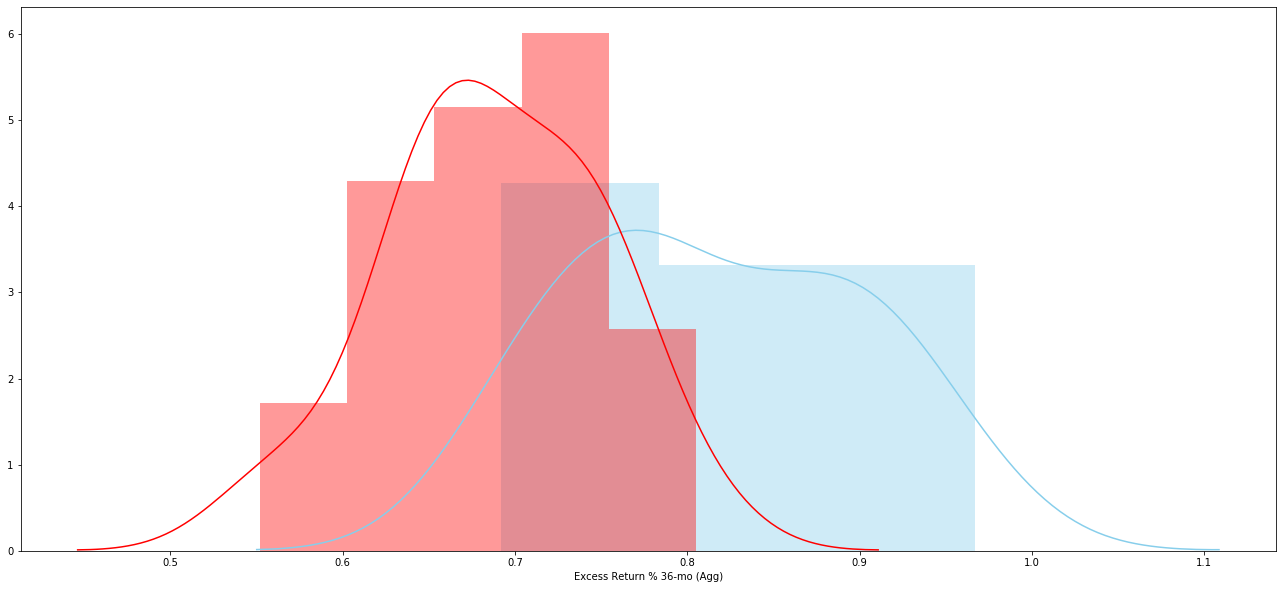

In [34]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")

# Now lets run the same t-test but with High spreads to all returns

In [35]:
df1 = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_IG.csv') 

In [36]:
df1.describe()

,OAS,Total Return % 1-mo-LOC,Agg Returns,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,279.000000,279.000000,279.000000,279.000000,279.000000,277.000000,277.000000,274.000000,274.000000,270.000000,270.000000,267.000000,267.000000,257.000000,257.000000,245.000000,245.000000,279.00000
mean,0.417782,0.610519,0.534440,0.504132,0.499413,0.494780,0.503562,0.482637,0.502400,0.492097,0.498393,0.491650,0.504837,0.509006,0.492070,0.501216,0.509136,2.55914
std,0.243309,0.118164,0.137960,0.243397,0.228002,0.227093,0.207410,0.224126,0.208517,0.216277,0.201213,0.212409,0.208761,0.226952,0.198216,0.196648,0.187849,1.08418
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,0.238259,0.555074,0.456258,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,2.00000
50%,0.375716,0.614830,0.539434,0.521049,0.502388,0.516951,0.505593,0.477463,0.484370,0.501543,0.487557,0.504171,0.498794,0.502269,0.492280,0.526284,0.541649,3.00000
75%,0.542955,0.673396,0.622920,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,3.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.00000


In [37]:
des, res = researchpy.ttest(df['OAS'], 
df1['Excess Return % 3-mo (Treasury)']) # notice we are using the High Spread Data for OAS

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   23.0  0.817571  0.083519  0.017415   
 1  Excess Return % 3-mo (Treasury)  277.0  0.494780  0.227093  0.013645   
 2                         combined  300.0  0.519527  0.235623  0.013604   
 
    95% Conf.  Interval  
 0   0.781454  0.853687  
 1   0.467919  0.521641  
 2   0.492756  0.546298  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...    0.3228
 1                              Degrees of freedom =   298.0000
 2                                               t =     6.7699
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.4691
 7                                       Hedge's g =     1.4654
 8           

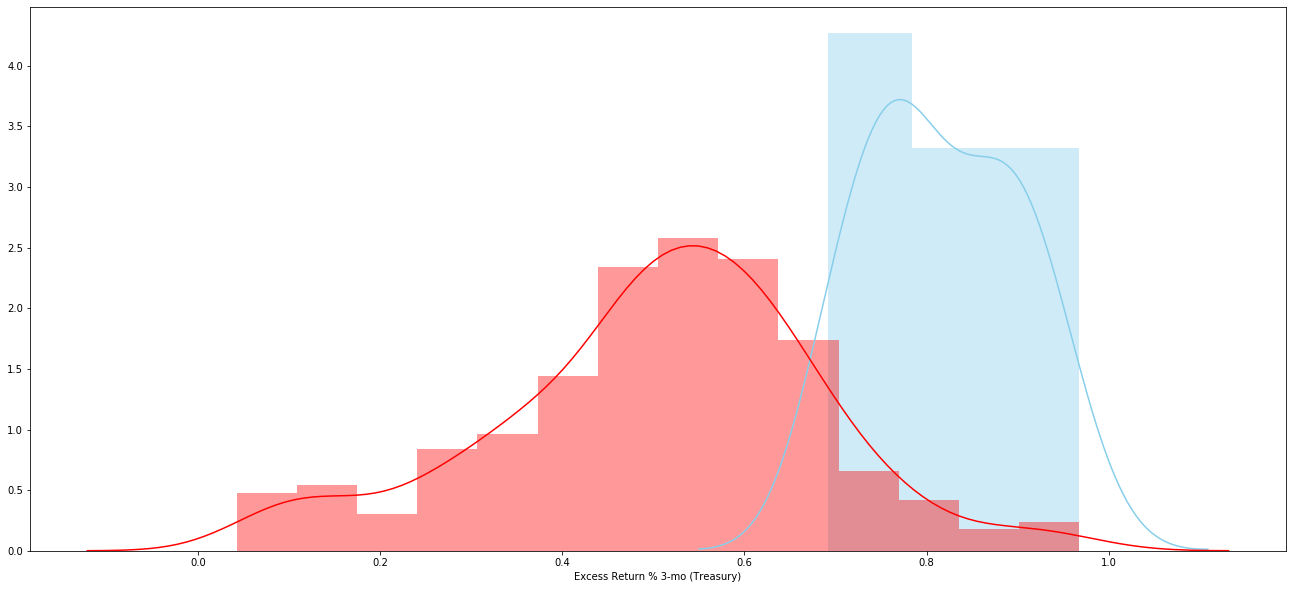

In [38]:
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [39]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   23.0  0.817571  0.083519  0.017415   0.781454   
 1  Excess Return % 3-mo (Agg)  277.0  0.503562  0.207410  0.012462   0.479029   
 2                    combined  300.0  0.527636  0.217316  0.012547   0.502945   
 
    Interval  
 0  0.853687  
 1  0.528095  
 2  0.552327  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =     0.3140
 1                             Degrees of freedom =   298.0000
 2                                              t =     7.2031
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.5631
 7                                      Hedge's g =     1.5591
 8                                  Glass'

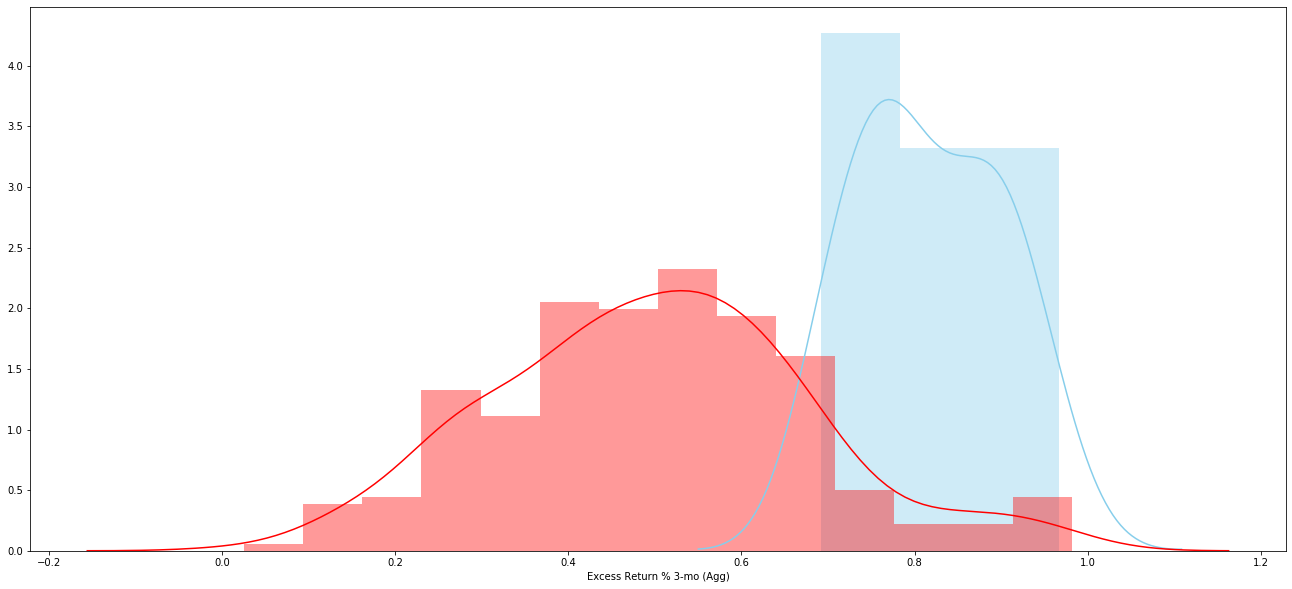

In [40]:
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [41]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   23.0  0.817571  0.083519  0.017415   
 1  Excess Return % 6-mo (Treasury)  274.0  0.482637  0.224126  0.013540   
 2                         combined  297.0  0.508575  0.234285  0.013595   
 
    95% Conf.  Interval  
 0   0.781454  0.853687  
 1   0.455981  0.509293  
 2   0.481821  0.535329  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...    0.3349
 1                              Degrees of freedom =   295.0000
 2                                               t =     7.1161
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.5448
 7                                       Hedge's g =     1.5409
 8           

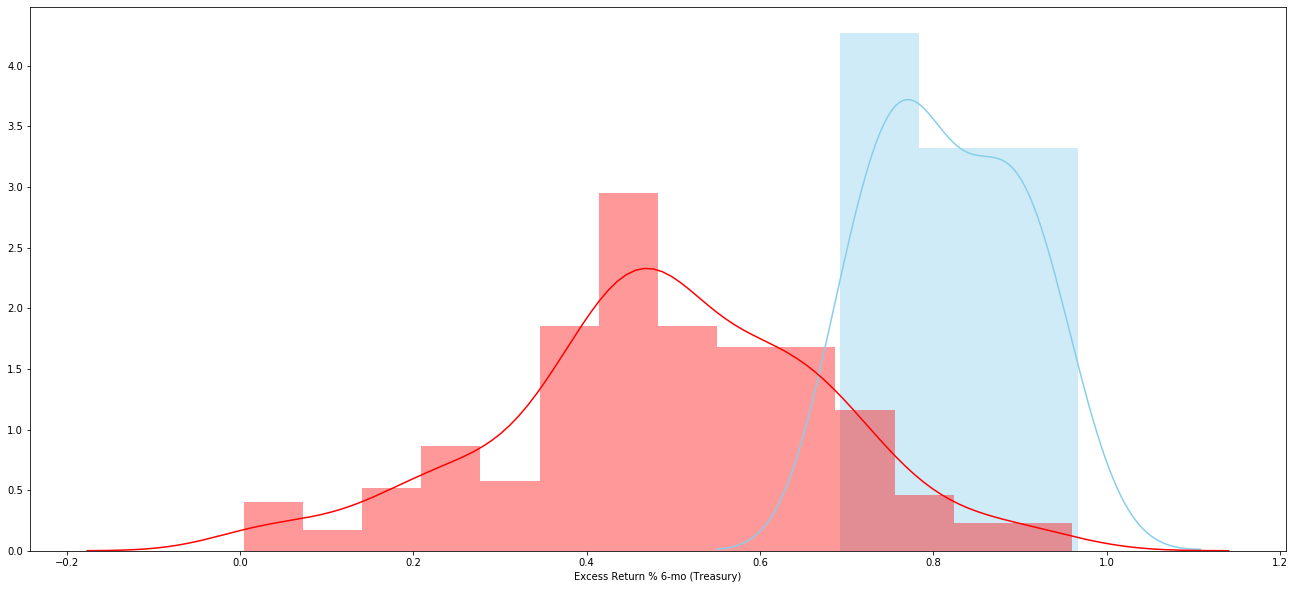

In [42]:
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [43]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   23.0  0.817571  0.083519  0.017415   0.781454   
 1  Excess Return % 6-mo (Agg)  274.0  0.502400  0.208517  0.012597   0.477601   
 2                    combined  297.0  0.526808  0.218495  0.012678   0.501856   
 
    Interval  
 0  0.853687  
 1  0.527200  
 2  0.551759  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =     0.3152
 1                             Degrees of freedom =   295.0000
 2                                              t =     7.1913
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.5611
 7                                      Hedge's g =     1.5572
 8                                  Glass'

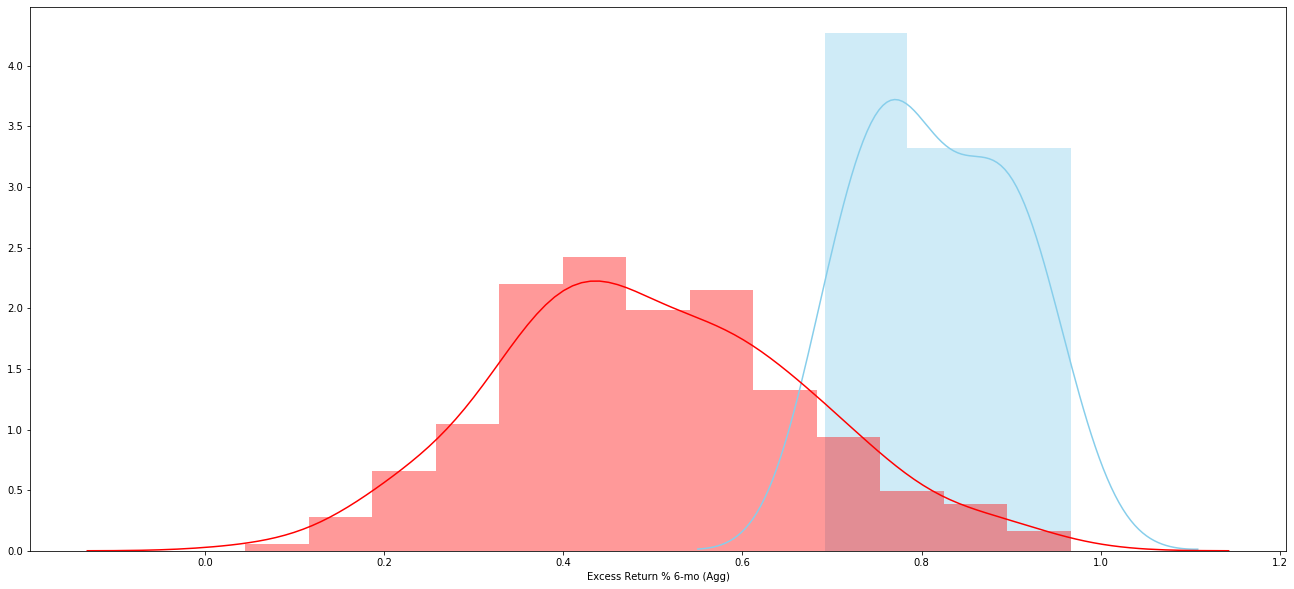

In [44]:
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [45]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   23.0  0.817571  0.083519  0.017415   
 1  Excess Return % 9-mo (Treasury)  270.0  0.492097  0.216277  0.013162   
 2                         combined  293.0  0.517646  0.226508  0.013233   
 
    95% Conf.  Interval  
 0   0.781454  0.853687  
 1   0.466183  0.518011  
 2   0.491603  0.543690  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...    0.3255
 1                              Degrees of freedom =   291.0000
 2                                               t =     7.1623
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.5558
 7                                       Hedge's g =     1.5517
 8           

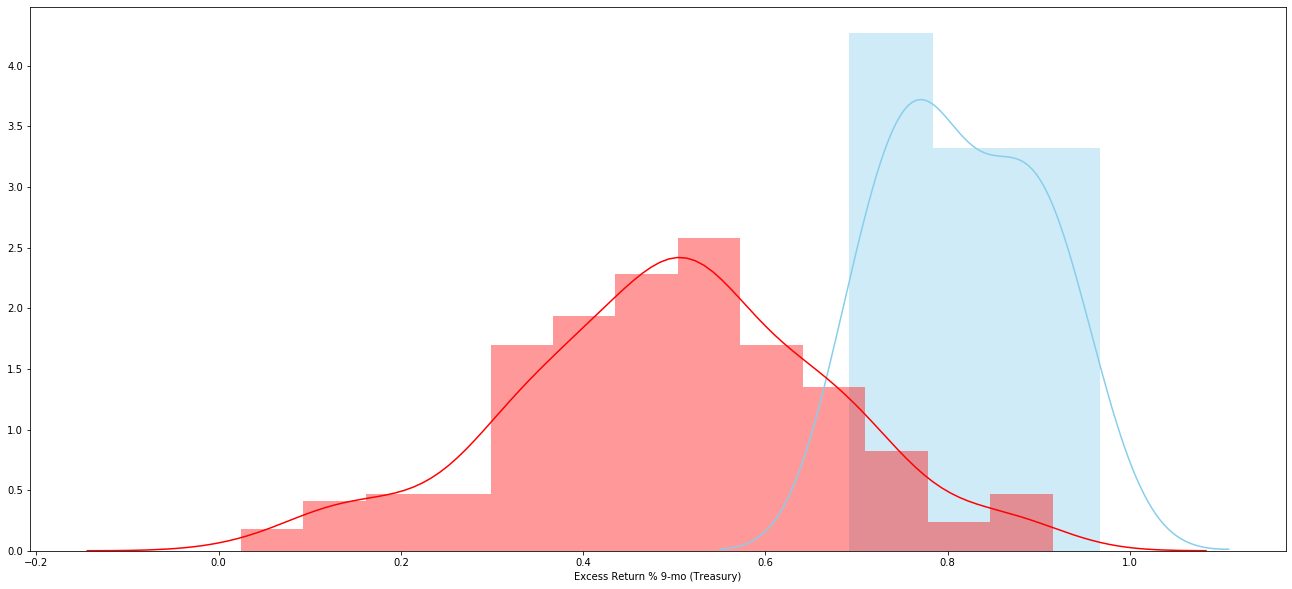

In [46]:
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [47]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   23.0  0.817571  0.083519  0.017415   0.781454   
 1  Excess Return % 9-mo (Agg)  270.0  0.498393  0.201213  0.012245   0.474284   
 2                    combined  293.0  0.523448  0.212644  0.012423   0.498998   
 
    Interval  
 0  0.853687  
 1  0.522502  
 2  0.547897  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =     0.3192
 1                             Degrees of freedom =   291.0000
 2                                              t =     7.5426
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.6384
 7                                      Hedge's g =     1.6341
 8                                  Glass'

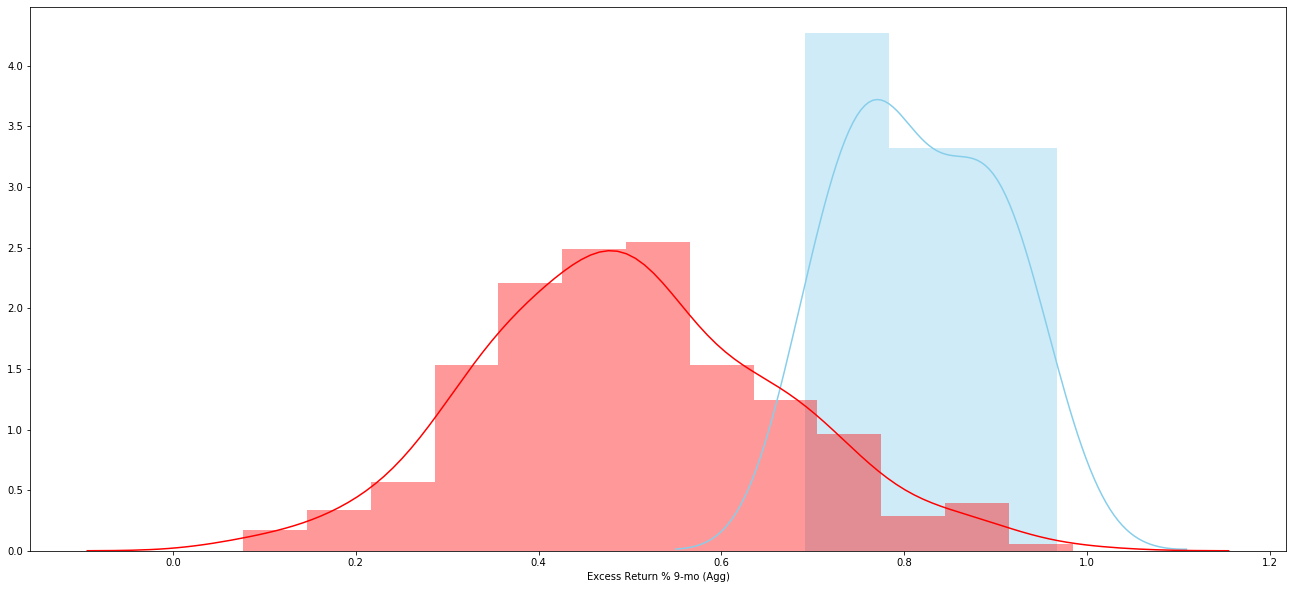

In [48]:
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [49]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   23.0  0.817571  0.083519  0.017415   
 1  Excess Return % 12-mo (Treasury)  267.0  0.491650  0.212409  0.012999   
 2                          combined  290.0  0.517499  0.223251  0.013110   
 
    95% Conf.  Interval  
 0   0.781454  0.853687  
 1   0.466056  0.517245  
 2   0.491696  0.543302  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Treas...    0.3259
 1                              Degrees of freedom =   288.0000
 2                                               t =     7.3006
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.5865
 7                                       Hedge's g =     1.5823
 8       

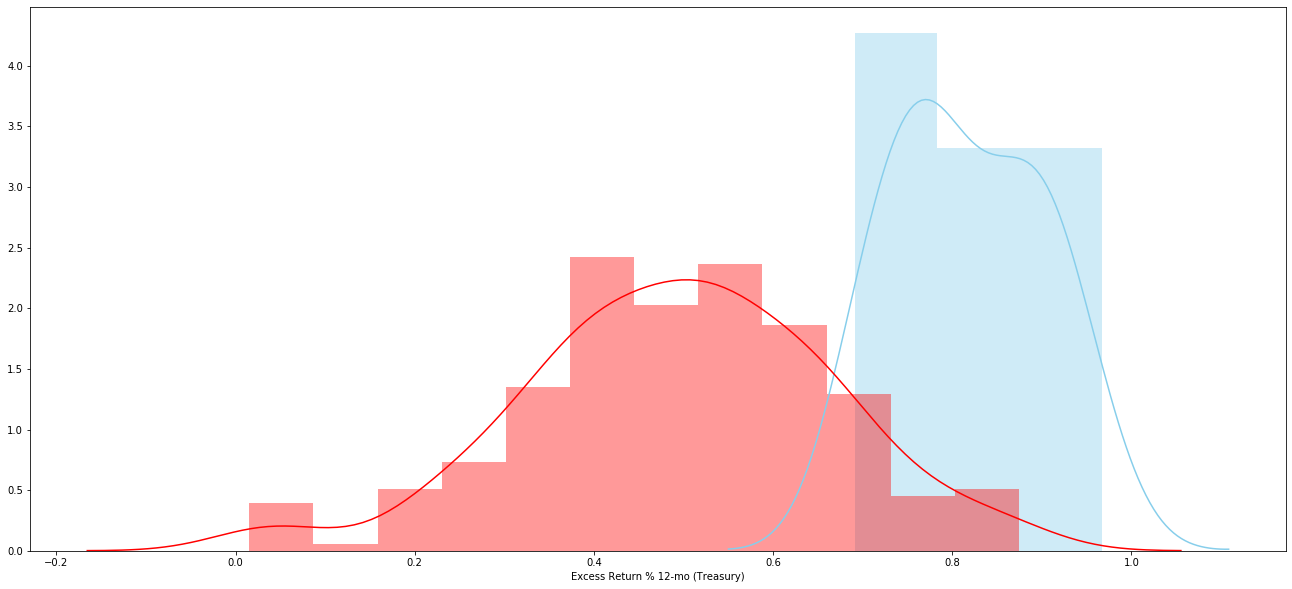

In [50]:
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([1],["NaN"])
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [51]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   23.0  0.817571  0.083519  0.017415   
 1  Excess Return % 12-mo (Agg)  267.0  0.504837  0.208761  0.012776   
 2                     combined  290.0  0.529640  0.218655  0.012840   
 
    95% Conf.  Interval  
 0   0.781454  0.853687  
 1   0.479682  0.529992  
 2   0.504369  0.554912  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =     0.3127
 1                              Degrees of freedom =   288.0000
 2                                               t =     7.1260
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.5485
 7                                       Hedge's g =     1.5445
 8                           

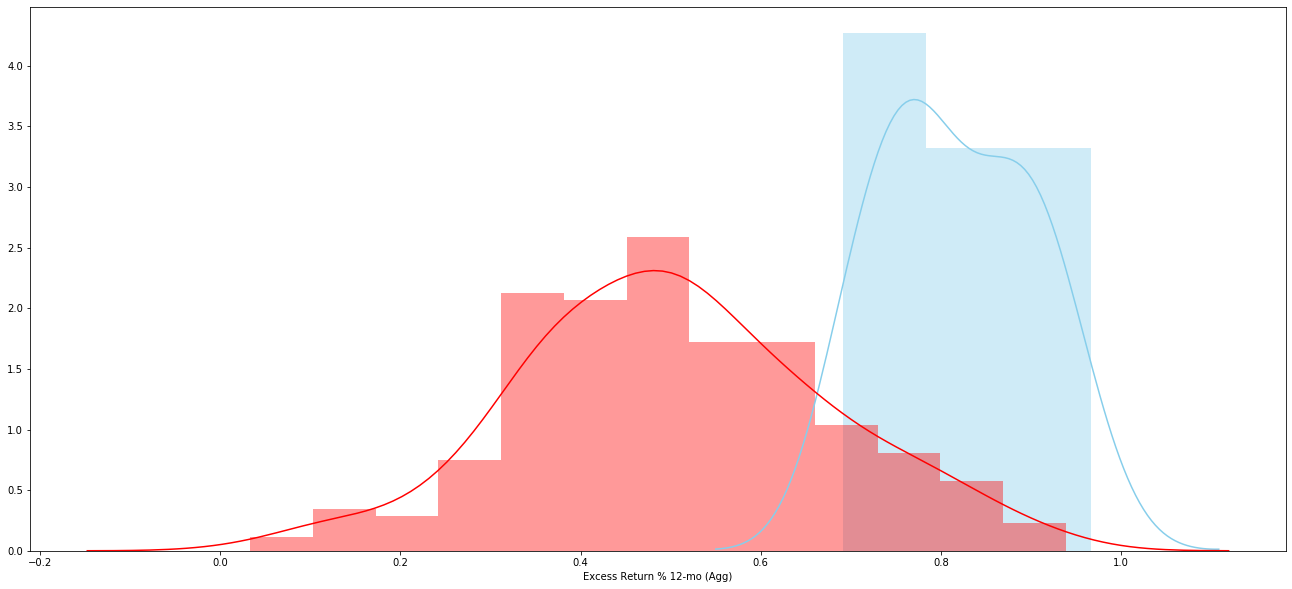

In [52]:
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [53]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   23.0  0.817571  0.083519  0.017415   
 1  Excess Return % 24-mo (Treasury)  257.0  0.509006  0.226952  0.014157   
 2                          combined  280.0  0.534353  0.234553  0.014017   
 
    95% Conf.  Interval  
 0   0.781454  0.853687  
 1   0.481127  0.536885  
 2   0.506760  0.561946  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Treas...    0.3086
 1                              Degrees of freedom =   278.0000
 2                                               t =     6.4722
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.4086
 7                                       Hedge's g =     1.4048
 8       

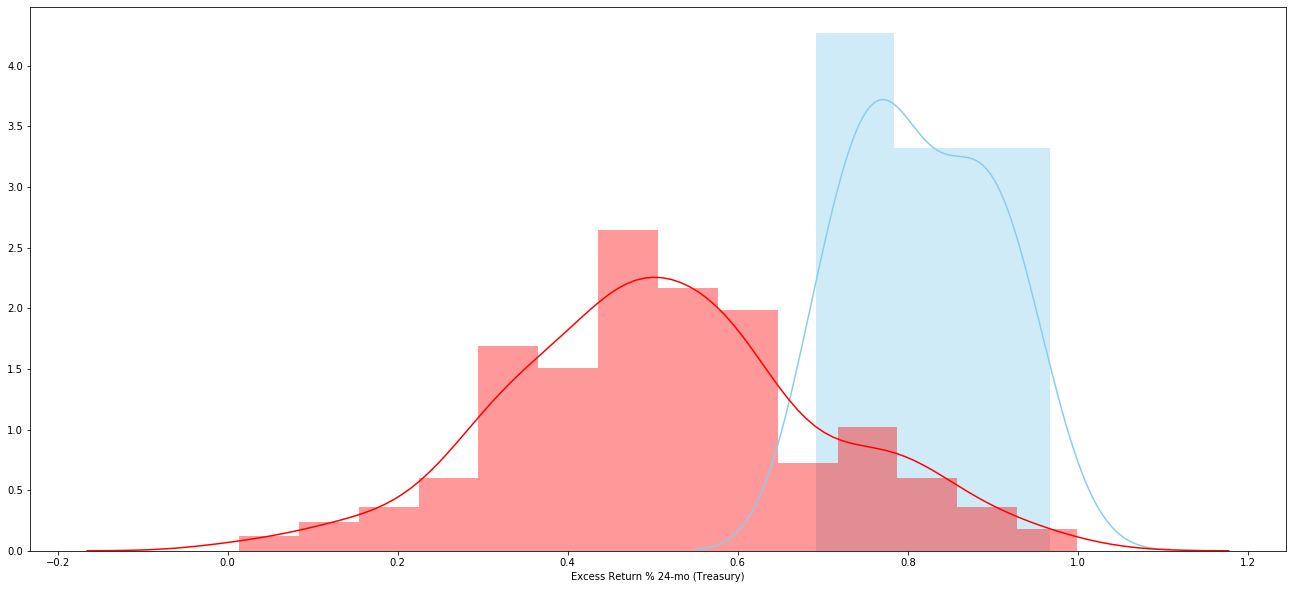

In [54]:
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [55]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   23.0  0.817571  0.083519  0.017415   
 1  Excess Return % 24-mo (Agg)  257.0  0.492070  0.198216  0.012364   
 2                     combined  280.0  0.518808  0.211228  0.012623   
 
    95% Conf.  Interval  
 0   0.781454  0.853687  
 1   0.467721  0.516419  
 2   0.493959  0.543657  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =     0.3255
 1                              Degrees of freedom =   278.0000
 2                                               t =     7.8033
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.6984
 7                                       Hedge's g =     1.6938
 8                           

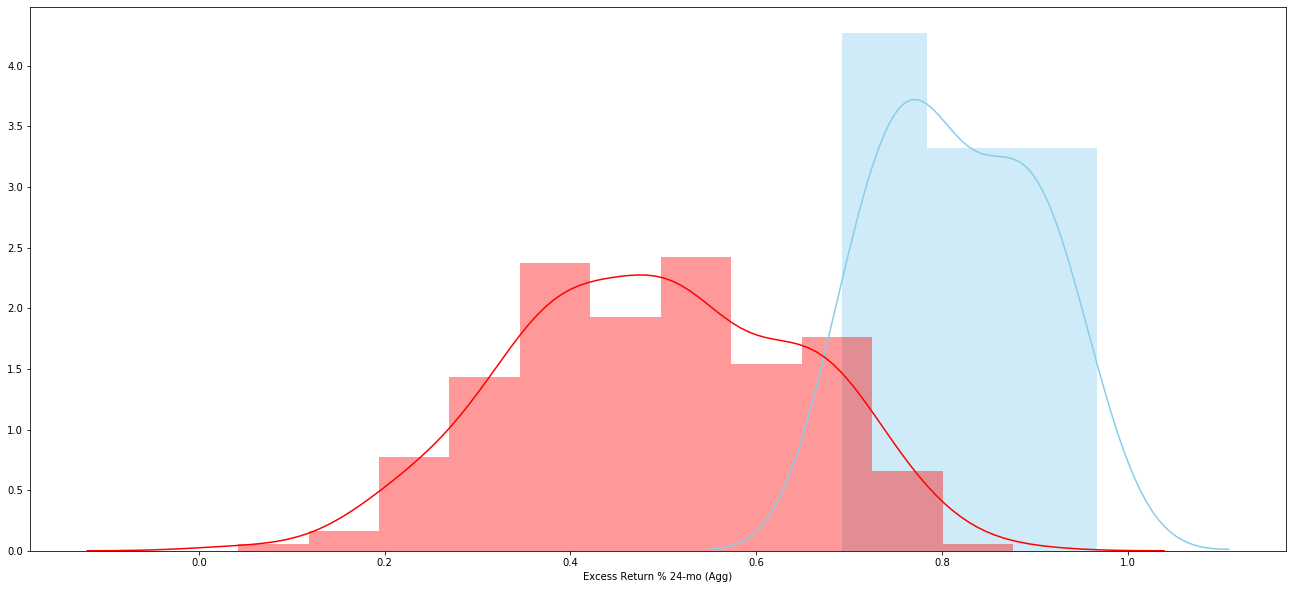

In [56]:
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [57]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   23.0  0.817571  0.083519  0.017415   
 1  Excess Return % 36-mo (Treasury)  245.0  0.501216  0.196648  0.012563   
 2                          combined  268.0  0.528366  0.209273  0.012783   
 
    95% Conf.  Interval  
 0   0.781454  0.853687  
 1   0.476470  0.525962  
 2   0.503197  0.553535  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Treas...    0.3164
 1                              Degrees of freedom =   266.0000
 2                                               t =     7.6403
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.6662
 7                                       Hedge's g =     1.6615
 8       

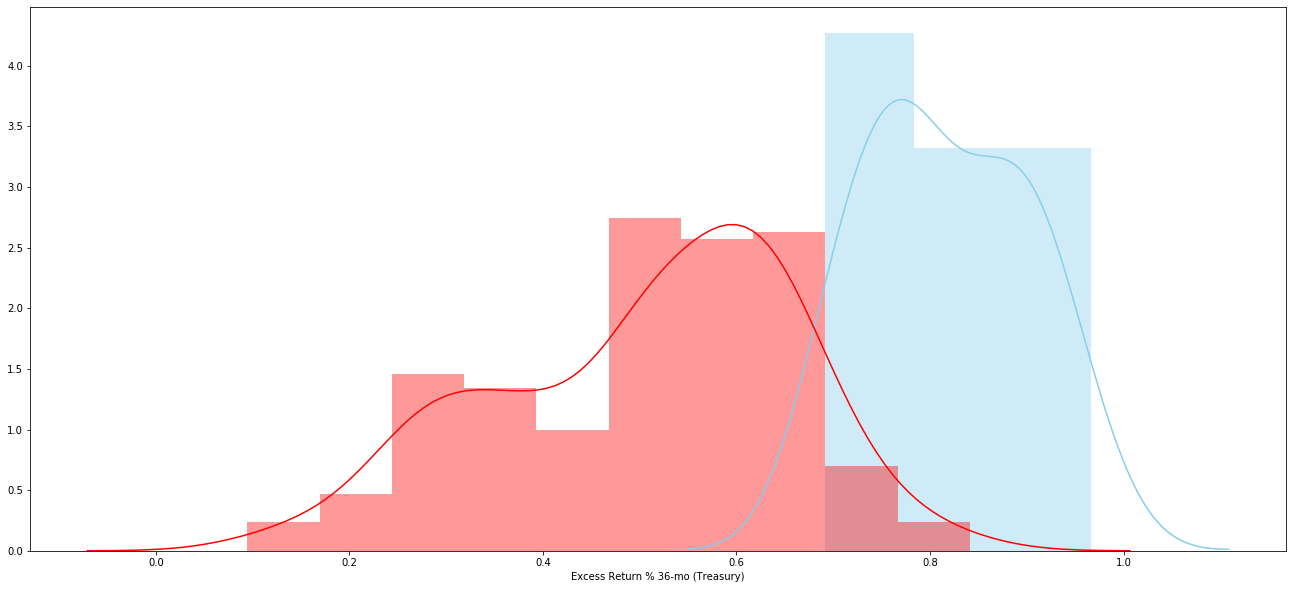

In [58]:
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [59]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   23.0  0.817571  0.083519  0.017415   
 1  Excess Return % 36-mo (Agg)  245.0  0.509136  0.187849  0.012001   
 2                     combined  268.0  0.535606  0.200783  0.012265   
 
    95% Conf.  Interval  
 0   0.781454  0.853687  
 1   0.485497  0.532775  
 2   0.511458  0.559754  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =     0.3084
 1                              Degrees of freedom =   266.0000
 2                                               t =     7.7919
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.6993
 7                                       Hedge's g =     1.6945
 8                           

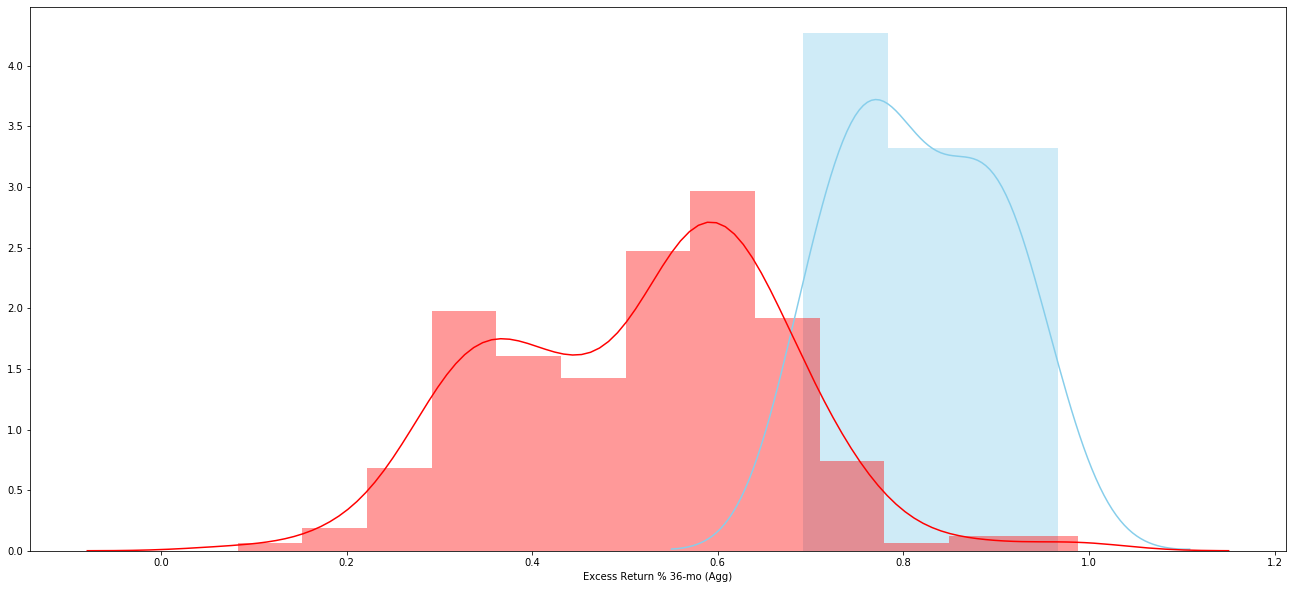

In [60]:
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")